In [127]:
import matplotlib.pyplot as plot
import matplotlib.image as mpimg
import numpy as numpy
import math

** Initalize lines **

In [128]:
numpy.random.seed(21)

left_lane_lines = numpy.random.randint(3, 15 + 1)
right_lane_lines = numpy.random.randint(3, 15 + 1)
noise_lines = numpy.random.randint(2, 10 + 1)

print('Lines: left - ', left_lane_lines, '; right - ', right_lane_lines, '; noise - ', noise_lines)

Lines: left -  12 ; right -  11 ; noise -  6


** initialize angles **

In [129]:
left_line_angles = numpy.random.normal(45, 3, left_lane_lines).astype(int)
right_line_angles = numpy.random.normal(135, 3, right_lane_lines).astype(int)
noise_line_angles = numpy.random.randint(0, 180 + 1, noise_lines)

** initialize lengths **

In [130]:
left_line_length = numpy.random.randint(5, 100, left_lane_lines)
right_line_length = numpy.random.randint(5, 100, right_lane_lines)
noise_line_length = numpy.random.randint(5, 100, noise_lines)

** merge angles with lengths **

In [193]:
def merge(*pairs):
    result = None
    for pair in pairs:
        for source, values in pair:
#             merged = numpy.insert(source[:, None], 1, values, axis=1)
            merged = numpy.append(source[:, None], values[:, None], axis=1)
            result = merged if result is None else numpy.concatenate((merged, result), axis=0)
    return result

pairs = [[noise_line_angles, noise_line_length], [left_line_angles, left_line_length], [right_line_angles, right_line_length]]
lines = merge(pairs)
numpy.random.shuffle(lines)

** Visualization of angles**

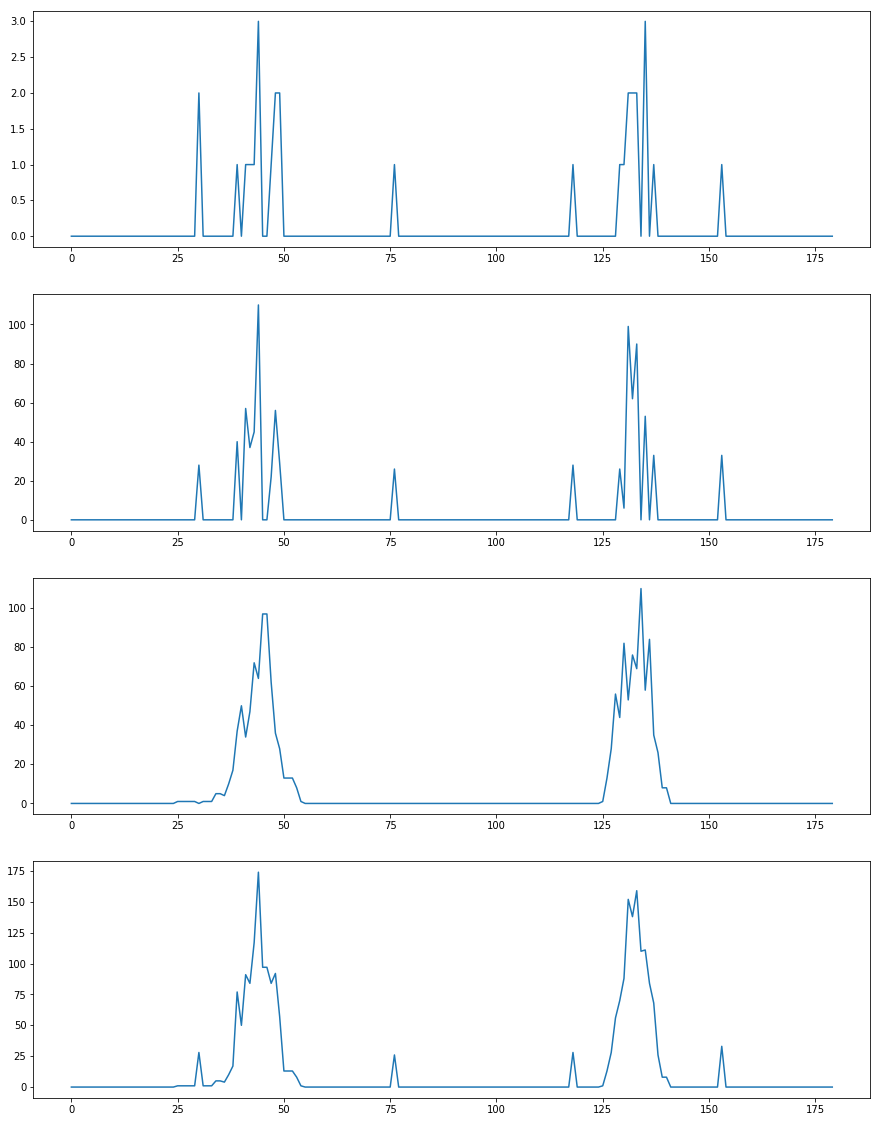

In [194]:
BINS = 180
RANGE = (0, 180)
OWN_LENGTH_WEIGHT = 0.6
NEIGHBOOR_LENGTH_WEIGHT = 0.3

def neighboors(quantity_array, weights_array, frame_size):
    frame_size += 1
    
    neighboors_info = []
    size = quantity_array.size
    neighboors_quantity_max = 0
    
    for index in range(size):
        neighboors_weight = 0
        neighboors_quantity = 0
        
        for i in range(index - frame_size + 1, index):
            if (i > 0):
                neighboors_quantity += quantity_array[i]
                neighboors_weight += weights_array[i]
            
        for i in range(index + 1, index + frame_size):
            if (i < size - 1):
                neighboors_quantity += quantity_array[i]
                neighboors_weight += weights_array[i]
        
        if (neighboors_quantity_max < neighboors_quantity):
            neighboors_quantity_max = neighboors_quantity

        neighboors_info.append([neighboors_quantity, neighboors_weight])
    
    total_weights = []
    for info in neighboors_info:
        quantity, weight = info
        total_weight = NEIGHBOOR_LENGTH_WEIGHT * weight * quantity / neighboors_quantity_max
        total_weights.append(total_weight)

    return numpy.array(total_weights).astype(int)

quantity_histogram = numpy.histogram(lines[:,0], bins=BINS, range=RANGE)[0]
length_weights = (lines[:,1] * OWN_LENGTH_WEIGHT).astype(int)
own_weights_histogram = numpy.histogram(
    lines[:,0],
    bins=BINS,
    range=RANGE,
    weights=length_weights
)[0]
neighboors_weights_histogram = neighboors(quantity_histogram, own_weights_histogram, 5)
result = neighboors_histogram + own_weights_histogram


plot.figure(figsize=(15, 20))
plot.subplot(411)
plot.plot(quantity_histogram)
plot.subplot(412)
plot.plot(own_weights_histogram)
plot.subplot(413)
plot.plot(neighboors_weights_histogram)
plot.subplot(414)
plot.plot(neighboors_histogram + own_weights_histogram)

plot.show()